In [7]:
import matplotlib.pyplot as plt
import math
import os
import csv
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [162]:
directory="./Data/individual_stocks_5yr/"

list_of_companies = []

class Company_info:
    data_point_count = 0
    def __init__(self, company_name, dates, close_prices, volumes):
        self.company_name = company_name
        self.dates = dates
        self.close_prices = close_prices
        self.volumes = volumes

#normalize (min/max) all our data and add them
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        with open(directory + filename, newline='') as csvfile:
            max_volume = 0
            min_volume = 999999
            max_close_price = 0
            min_close_price = 999999
            reader = csv.reader(csvfile, delimiter=',', quotechar='|')
            company_name = filename
            dates = []
            close_prices = []
            volumes = []
            
            for row in reader: #date,open,high,low,close,volume,Name
                #skip first line
                if(row[0]  == "date"):
                    continue;
                date = row[0]
                close_price = float(row[4])
                volume = float(row[5])
                dates.append(date)
                close_prices.append(close_price)
                volumes.append(volume)
                
                if(close_price > max_close_price):
                    max_close_price = close_price
                if(close_price < min_close_price):
                    min_close_price = close_price
                if(volume > max_volume):
                    max_volume = volume
                if(volume < min_volume):
                    min_volume = volume   
                         
            for i in range(len(close_prices)):
                close_prices[i] = (close_prices[i] - min_close_price) / (max_close_price - min_close_price)
            
            for i in range(len(volumes)):
                volumes[i] = (volumes[i] - min_volume) / (max_volume - min_volume)
                
            company_info = Company_info(filename,dates, close_prices,volumes)
            list_of_companies.append(company_info)
        continue
    else:
        continue

print(len(list_of_companies))

valid_companies = []
for i in range(len(list_of_companies)):
    #note that some companies were removed/added into the s&p within our timeframe of 5 years
    #well remove them to simplify our model
    if(len(list_of_companies[i].dates) == 1259):
        valid_companies.append(list_of_companies[i])
        
print("valid company len " + str(len(valid_companies)))
print("company 0 dates 0 " + str(valid_companies[0].dates[0]))
print("company 0 last date "+ str(valid_companies[0].dates[len(valid_companies[0].dates)-1]))
print("company 0 date len " + str(len(valid_companies[0].dates)))
print("company 0 name " + valid_companies[0].company_name)

print(valid_companies[1].dates[0])
print(valid_companies[1].dates[len(valid_companies[1].dates)-1])
print(len(valid_companies[1].dates))
print(valid_companies[1].company_name)


#get min/max of snp data
snp_data = []
snp_close_max = 0
snp_close_min = 99999
with open("./Data/s&p.csv", newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for row in reader:
        if(row[0]  == "Date"):
            continue;
        close_price = float(row[4])
        snp_data.append(close_price) #Date,Open,High,Low,Close,Adj Close,Volume
        if(close_price < snp_close_min):
            snp_close_min = close_price
        if(close_price > snp_close_max):
            snp_close_max = close_price    
            
print(len(snp_data))
print(snp_data[0])
print(snp_data[len(snp_data)-1])

#normalize snp data
for i in range (len(snp_data)):
    snp_data[i] = (snp_data[i] - snp_close_min) / (snp_close_max - snp_close_min)

505
valid company len 470
company 0 dates 0 2013-02-08
company 0 last date 2018-02-07
company 0 date len 1259
company 0 name AAL_data.csv
2013-02-08
2018-02-07
1259
AAPL_data.csv
1259
1517.930054
2681.659912


1259
1259
1259
1259
1259


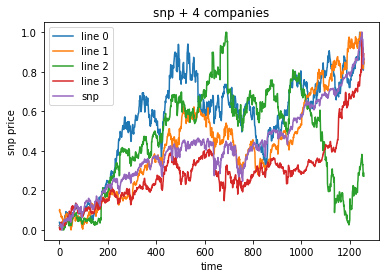

In [167]:
#lets take a look at our data for individual companies and see if they've been normalized correctly
for i in range (4):
    print(len(valid_companies[i].close_prices))
    plt.plot(np.array(valid_companies[i].close_prices), label = "line " + str(i))

print(len(snp_data))
plt.plot(np.array(snp_data), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("snp + 4 companies")

plt.show()  


In [179]:
#format our company info into a time series of company data (1259 days, 470 companies, 2 features)

all_data = []
date_range = 1259 # we have 1259 dates/data points

try:
    for date_index in range(date_range):
        data_column = []
        for i in range(len(valid_companies)):
            company = valid_companies[i]
            if(date_index>len(company.close_prices)):
                print("====")
                print(len(company.close_prices))
                print(len(company.dates))
            data_column.append([company.close_prices[date_index], company.volumes[date_index]])

        all_data.append(data_column)
except:
    print(valid_companies[i].company_name)

print((np.array(all_data)).shape)

(1259, 470, 2)


c2c_all_data shape (1255, 3, 470, 2)
c2c_all_label_window_3 shape(1255, 470, 2)
Data points for the past 3 days
[0.03806381 0.0541614 ]
[0.03168317 0.0576308 ]
[0.02750275 0.05210316]
Prediction for next day: 
[0.03608361 0.06770266]
Data points for the past 3 days
[0.03168317 0.0576308 ]
[0.02750275 0.05210316]
[0.03608361 0.06770266]
Prediction for next day: 
[0.02134213 0.22578446]
Data points for the past 3 days
[0.02750275 0.05210316]
[0.03608361 0.06770266]
[0.02134213 0.22578446]
Prediction for next day: 
[0.03256326 0.1069555 ]
Data points for the past 3 days
[0.03608361 0.06770266]
[0.02134213 0.22578446]
[0.03256326 0.1069555 ]
Prediction for next day: 
[0.02728273 0.07570824]
Data points for the past 3 days
[0.02134213 0.22578446]
[0.03256326 0.1069555 ]
[0.02728273 0.07570824]
Prediction for next day: 
[0.00682068 0.1003545 ]
Data points for the past 3 days
[0.03256326 0.1069555 ]
[0.02728273 0.07570824]
[0.00682068 0.1003545 ]
Prediction for next day: 
[0.00770077 0.079859

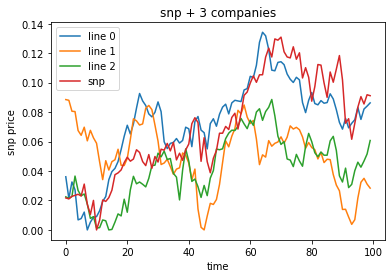

c2c_train_label.shape(1129, 3, 470, 2)
c2c_train_label.shape(1129, 470, 2)
c2c_train_label.shape(126, 3, 470, 2)
c2c_train_label.shape(126, 470, 2)
c2c_train_label.shape(530630, 3, 2)
c2c_train_label.shape(530630, 2)
c2c_train_label.shape(59220, 3, 2)
c2c_train_label.shape(59220, 2)
1259


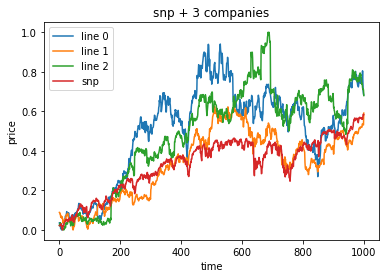

In [206]:
"""
Input:
    Shape: [dates x companies x [closing_price, volume]]
            1259 x 470 x 2

    [ #column 1
        [closing_price[1], volume[1]]
    ],
    [ #column 2
        [closing_price[2], volume[2]]
    ],
    ...


Output:
    Shape: 1
    snp_closing_price

"""


#company to company  data
c2c_all_data_window_3 = []
c2c_all_label_window_3 = []
c2c_train_data = []
c2c_train_label = []
c2c_test_data = []
c2c_test_label = []

window_data_points = 3 #TODO, can graph how many window datapoints affects the result. Probably more = better memory

#create our windows
for i in range(len(all_data) - window_data_points - 1):
    temp = []
    for j in range (window_data_points):
        temp.append(all_data[i + j])
    c2c_all_data_window_3.append(temp)
    c2c_all_label_window_3.append(all_data[i + window_data_points])
  
#convert to np arrays
c2c_all_data_window_3 = np.array(c2c_all_data_window_3) 
c2c_all_label_window_3 = np.array(c2c_all_label_window_3) 
c2c_train_data = np.array(c2c_train_data) 
c2c_train_label = np.array(c2c_train_label) 

print("c2c_all_data shape " + str(c2c_all_data_window_3.shape))
print("c2c_all_label_window_3 shape" + str(c2c_all_label_window_3.shape))


#verify our windows are correct. IMPORTANT: notice how that data points are shifting. One window's prediction becomes the next windows datapoints.
for i in range(10):
    print("Data points for the past " + str(window_data_points) + " days")
    for j in range(window_data_points):
        print(c2c_all_data_window_3[i][j][0]) # print the first company's first 10 data points
    print("Prediction for next day: ")
    print(c2c_all_label_window_3[i][0])
    print("=================")
  
#lets plot our train labels to see if they look correct
for c in range (3):
    companyPoints = []
    for i in range(100):
        companyPoints.append(c2c_all_label_window_3[i][c][0])
    plt.plot(np.array(companyPoints), label = "line " + str(c))

#plot snp for reference
print(len(snp_data))
plt.plot(np.array(snp_data[:100]), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("snp + 3 companies")
plt.show()  


#split our data
c2c_train_data, c2c_test_data, c2c_train_label, c2c_test_label = train_test_split(c2c_all_data_window_3, c2c_all_label_window_3, test_size=0.1, shuffle=False)

print("c2c_train_label.shape" + str(c2c_train_data.shape))
print("c2c_train_label.shape" + str(c2c_train_label.shape))
print("c2c_train_label.shape" + str(c2c_test_data.shape))
print("c2c_train_label.shape" + str(c2c_test_label.shape))

# Need to reshape these datasets into a format LSTM understands
# Original data:
# 1255 windows
# 3 days in the window
# 470 companies
# 2 features (closing price, volume)

# Train data: 1129 windows
# Data: (1129, 3, 470, 2) input tensor into (530630, 3, 2)
# Label: (1129, 470, 2) output tensor into (530630, 2)

# Test data: 126 windows, 3 days per window, 470 companies, 2 features
# Data: (126, 3, 470, 2) => (59220, 3, 2)
# Label: (126, 470, 2) => (59220, 2)

c2c_train_data = c2c_train_data.reshape(530630, 3, 2)
c2c_train_label = c2c_train_label.reshape(530630, 2)
c2c_test_data = c2c_test_data.reshape(59220,3, 2)
c2c_test_label = c2c_test_label.reshape(59220, 2)

print("c2c_train_label.shape" + str(c2c_train_data.shape))
print("c2c_train_label.shape" + str(c2c_train_label.shape))
print("c2c_train_label.shape" + str(c2c_test_data.shape))
print("c2c_train_label.shape" + str(c2c_test_label.shape))

#lets test that our reshape didn't mess anything up
c2c_train_label_exp = c2c_train_label.reshape(1129, 470, 2)
days_to_plot = 1000
for c in range (3):
    companyPoints = []
    for i in range(days_to_plot):
        companyPoints.append(c2c_train_label_exp[i][c][0])
    plt.plot(np.array(companyPoints), label = "line " + str(c))

print(len(snp_data))
plt.plot(np.array(snp_data[:days_to_plot]), label = "snp")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.title("snp + 3 companies")

plt.show()  


In [128]:
# print out shapes for reference
print("c2c_train_data shape " + str(c2c_train_data.shape))
print("c2c_train_label shape" + str(c2c_train_label.shape))
print("c2c_test_data shape " + str(c2c_test_data.shape))
print("c2c_test_label shape" + str(c2c_test_label.shape))

c2c_train_data shape (530630, 3, 2)
c2c_train_label shape(530630, 2)
c2c_test_data shape (59220, 3, 2)
c2c_test_label shape(59220, 2)


In [134]:
units = 256
output_size = 1

model = keras.Sequential()
model.add(keras.layers.LSTM(units, activation="relu", return_sequences=False, batch_input_shape=(None, 3, 2)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2, activation="sigmoid"))

model.summary()

opt = keras.optimizers.SGD(learning_rate=0.1)

model.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=["mean_squared_error"],
)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 256)               265216    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 514       
Total params: 265,730
Trainable params: 265,730
Non-trainable params: 0
_________________________________________________________________


In [135]:
batch_size = 1024
epochs = 30
"""
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=5
)
"""
print(c2c_train_data.shape)
history = model.fit(
    c2c_train_data, c2c_train_label, validation_data=(c2c_test_data, c2c_test_label), batch_size=batch_size, epochs=epochs
)

(530630, 3, 2)
Epoch 1/30
1037/1037 [==============================] - 26s 24ms/step - loss: 0.0508 - mean_squared_error: 0.0508 - val_loss: 0.0644 - val_mean_squared_error: 0.0644
Epoch 2/30
1037/1037 [==============================] - 25s 24ms/step - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 3/30
1037/1037 [==============================] - 26s 25ms/step - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0590 - val_mean_squared_error: 0.0590
Epoch 4/30
1037/1037 [==============================] - 26s 25ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 5/30
1037/1037 [==============================] - 25s 24ms/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0544 - val_mean_squared_error: 0.0544
Epoch 6/30
1037/1037 [==============================] - 25s 24ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0523 - val_mean_squared_err

30


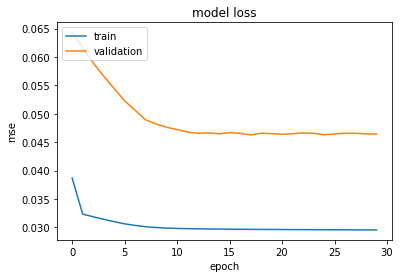

In [136]:
def plotModel(history):
    
    plt.clf()
    print(len(history.history['loss']))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
plotModel(history)

# Get some predictions and graph them:

(530630, 3, 2)
prediuction shape (1000, 470, 2)
prediuction len 1000
prediuction len 1000
prediuction len 1000
prediuction len 1000
c2c_train_label.shape (530630, 2)
1259


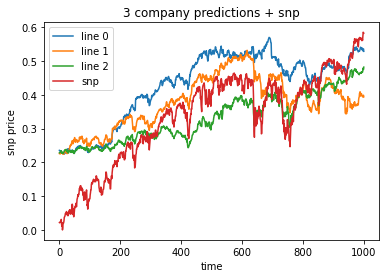

1
1007
[array([[0.48774666, 0.10894361],
       [0.5016432 , 0.10684198],
       [0.44641113, 0.1109086 ],
       ...,
       [0.42293605, 0.1113112 ],
       [0.39622036, 0.1121864 ],
       [0.4254009 , 0.11180982]], dtype=float32)]


In [163]:
"""
Input: Past stock info (previous 3 days)
c2c_train_data shape (1129, 3, 470, 2)

1129 windows
3 items in windows
470 individual companies with
2 features each (closing price, volume)


Output: Future stock info (next day)
c2c_train_label shape(1129, 470, 2)
1129 windows
470 individual companies with
2 features each (closing price, volume)

"""

print(c2c_train_data.shape)
days_to_pred = 1000
companies_to_pred = 3
prediction = model.predict(np.array(c2c_train_data[:(470 * days_to_pred)]))
prediction = prediction.reshape(days_to_pred, 470, 2)
print("prediuction shape " + str(prediction.shape))
print("prediuction len " + str(len(prediction)))
  

for c in range (companies_to_pred):
    companyPoints = []
    for i in range(days_to_pred):
        companyPoints.append(prediction[i][c][0])
    print("prediuction len " + str(len(prediction)))
    plt.plot(np.array(companyPoints), label = "line " + str(c))

print("c2c_train_label.shape " + str(c2c_train_label.shape))


print(len(snp_data))
plt.plot(np.array(snp_data[:days_to_pred]), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("3 company predictions + snp")
plt.show()  


(1255, 470, 2)


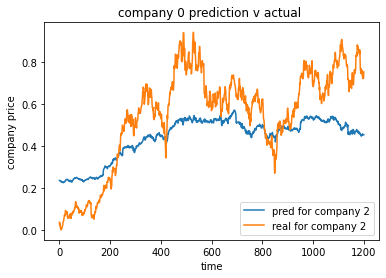

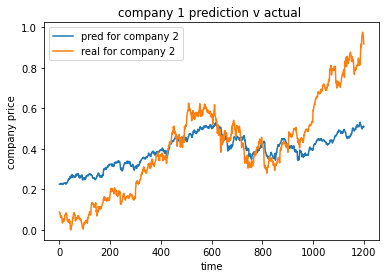

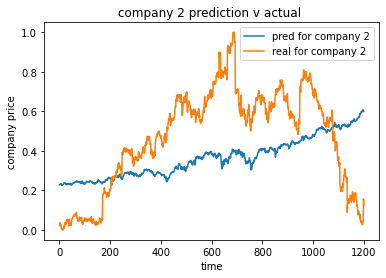

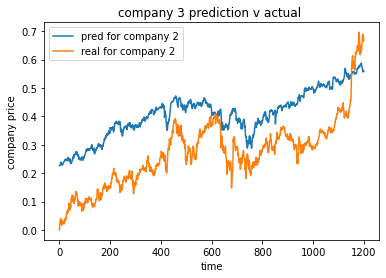

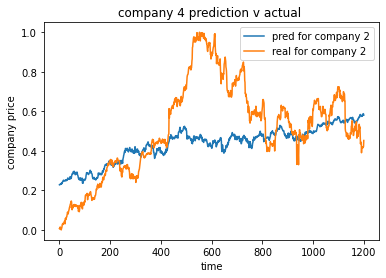

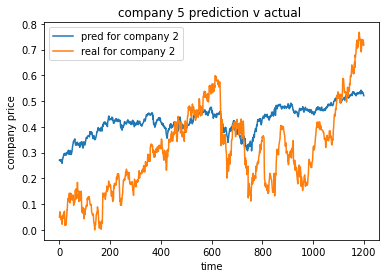

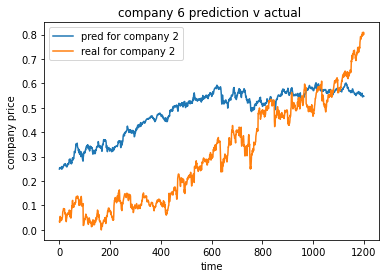

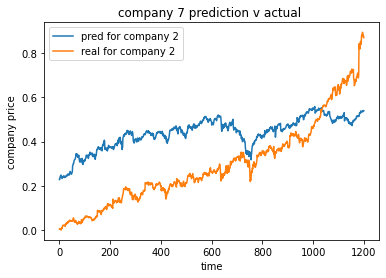

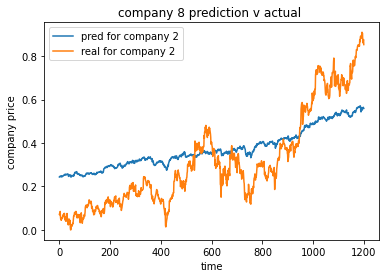

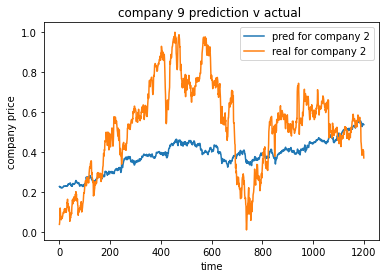

In [304]:
def predictCompany(companies_to_pred, company_index, days_to_pred, model, predict_data, actual_data, windows, window_size):
    days_to_pred = days_to_pred
    predict_data = predict_data.reshape(windows * 470, window_size, 2)
    predictions = model.predict(predict_data)
    predictions = predictions.reshape(windows, 470, 2)
    print(predictions.shape)
    for c in range (10):
        companyPoints = []

        for i in range(days_to_pred):
            companyPoints.append(predictions[i][c][0])
        plt.plot(np.array(companyPoints), label = "pred for company " + str(company_index))

        companyPoints = []
        actual_data = actual_data.reshape(windows, 470, 2)
        for i in range(days_to_pred):
            companyPoints.append(actual_data[i][c][0])
        plt.plot(np.array(companyPoints), label = "real for company " + str(company_index))

        plt.xlabel('time')
        plt.ylabel('company price')
        plt.legend()
        plt.title("company " + str(c) + " prediction v actual ",)
        plt.show() 
    return predictions
    
predictions_individual_window3 = predictCompany(10, i, 1200, model, c2c_all_data_window_3, c2c_all_label_window_3, 1255, 3)

(589850, 3, 2)
prediuction shape (1255, 470, 2)
prediuction len 1255
comp_sum_points len1255
1259


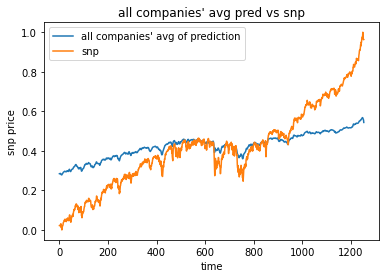

In [272]:
def predict_sum_snp(model, prediction_data, days_to_pred):
    #Lets average all our predictions into a single scalar and compare vs snp
    companies_to_pred = 470 # we have info for 470 companies
    days_to_pred = days_to_pred 

    print(prediction_data.shape)
    prediction_data = prediction_data 

    prediction = model.predict(np.array(prediction_data[:(470 * days_to_pred)]))
    prediction = prediction.reshape(days_to_pred, 470, 2)
    print("prediuction shape " + str(prediction.shape))
    print("prediuction len " + str(len(prediction)))



    all_companies_points = []
    for c in range (companies_to_pred):
        companyPoints = []
        for i in range(days_to_pred):
            companyPoints.append(prediction[i][c][0])
        all_companies_points.append(companyPoints)

    comp_num = len(all_companies_points)
    comp_sum_points = []
    for d in range(days_to_pred):
        curr_comp_sum = 0
        for c in range(comp_num):
            curr_comp_sum += all_companies_points[c][d]
        comp_sum_points.append(curr_comp_sum/comp_num) #avg it out

    print("comp_sum_points len" + str(len(comp_sum_points)))

    plt.plot(np.array(comp_sum_points[:days_to_pred]), label = "all companies' avg of prediction")

    #snp data
    print(len(snp_data))
    plt.plot(np.array(snp_data[:days_to_pred]), label = "snp")
    plt.xlabel('time')
    plt.ylabel('snp price')
    plt.legend()
    plt.title("all companies' avg pred vs snp")
    plt.show()  
    
    return comp_sum_points

comp_sum_points_window_3 = predict_sum_snp(model, c2c_all_data_window_3.reshape(589850, 3, 2), 1255) #(1255, 3, 470, 2) becomes (589850, 3, 2)

# Let's recreate the model with a different window parameter (10)


In [216]:

#company to company  data
c2c_all_data_window_10 = []
c2c_all_label_window_10 = []
c2c_train_data = []
c2c_train_label = []
c2c_test_data = []
c2c_test_label = []

window_data_points = 10 #TODO, can graph how many window datapoints affects the result. Probably more = better memory

#create our windows
for i in range(len(all_data) - window_data_points - 1):
    temp = []
    for j in range (window_data_points):
        temp.append(all_data[i + j])
    c2c_all_data_window_10.append(temp)
    c2c_all_label_window_10.append(all_data[i + window_data_points])
  
#convert to np arrays
c2c_all_data_window_10 = np.array(c2c_all_data_window_10) 
c2c_all_label_window_10 = np.array(c2c_all_label_window_10) 
c2c_train_data = np.array(c2c_train_data) 
c2c_train_label = np.array(c2c_train_label) 

#split our data
c2c_train_data, c2c_test_data, c2c_train_label, c2c_test_label = train_test_split(c2c_all_data_window_10, c2c_all_label_window_10, test_size=0.1, shuffle=False)

# Need to reshape these datasets into a format LSTM understands
# Train data: 1248 windows, 30 days in the window, 470 companies,2 features (closing price, volume)
# Data: (1123, 10, 470, 2) input tensor into (527810, 10, 2)
# Label: (1123, 470, 2) output tensor into (527810, 2)

# Test data: 125 windows, 10 days per window, 470 companies, 2 features
# Data: (125, 10, 470, 2) => (58750, 10, 2)
# Label: (125, 470, 2) => (58750, 2)
c2c_train_data = c2c_train_data.reshape(527810, 10, 2)
c2c_train_label = c2c_train_label.reshape(527810, 2)
c2c_test_data = c2c_test_data.reshape(58750, 10, 2)
c2c_test_label = c2c_test_label.reshape(58750, 2)

# print out shapes for reference
print("c2c_train_data shape " + str(c2c_train_data.shape))
print("c2c_train_label shape" + str(c2c_train_label.shape))
print("c2c_test_data shape " + str(c2c_test_data.shape))
print("c2c_test_label shape" + str(c2c_test_label.shape))

c2c_train_data shape (527810, 10, 2)
c2c_train_label shape(527810, 2)
c2c_test_data shape (58750, 10, 2)
c2c_test_label shape(58750, 2)


In [187]:
units = 256
output_size = 1

model_window_10 = keras.Sequential()
model_window_10.add(keras.layers.LSTM(units, activation="relu", return_sequences=False, batch_input_shape=(None, 10, 2)))
model_window_10.add(keras.layers.Dropout(0.2))
model_window_10.add(keras.layers.Dense(2, activation="sigmoid"))

model_window_10.summary()

opt = keras.optimizers.SGD(learning_rate=0.1)

model_window_10.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=["mean_squared_error"],
)

batch_size = 1024
epochs = 30

history_window_10 = model_window_10.fit(
    c2c_train_data, c2c_train_label, validation_data=(c2c_test_data, c2c_test_label), batch_size=batch_size, epochs=epochs
)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 256)               265216    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 514       
Total params: 265,730
Trainable params: 265,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
516/516 [==============================] - 81s 156ms/step - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0629 - val_mean_squared_error: 0.0629
Epoch 2/30
516/516 [==============================] - 80s 155ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0591 - val_mean_squared_error: 0.0591
Epoch 3/30
516/516 [===========================

30


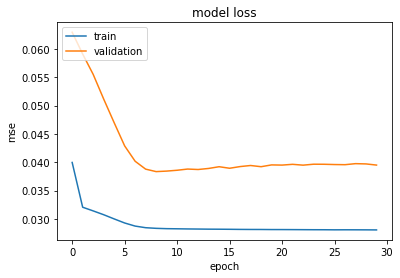

In [189]:
plotModel(history_window_10)

(586560, 10, 2)
prediuction shape (1248, 470, 2)
prediuction len 1248
comp_sum_points len1248
1259


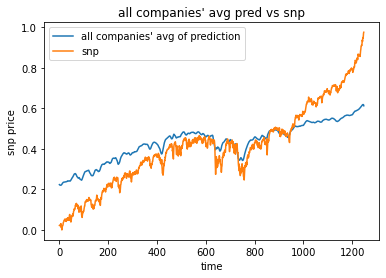

In [273]:
comp_sum_points_window_10 = predict_sum_snp(model_window_10, c2c_all_data_window_10.reshape(586560, 10, 2), 1248) #(1248, 10, 470, 2) becomes (586560, 10, 2)

(1248, 470, 2)
(1248, 470, 2)


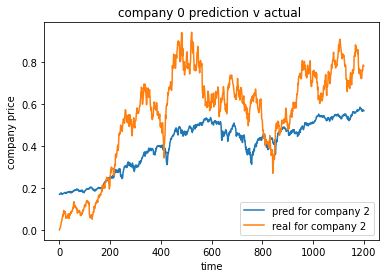

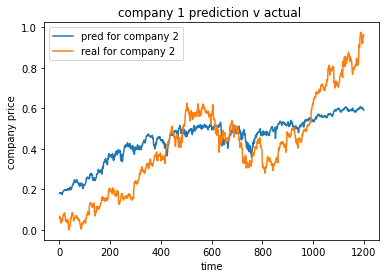

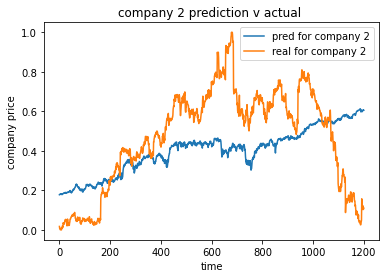

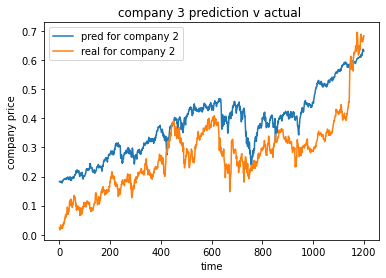

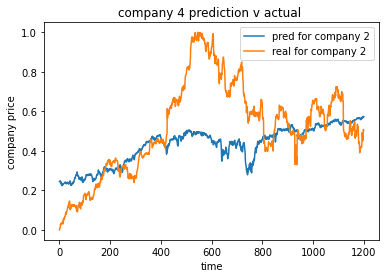

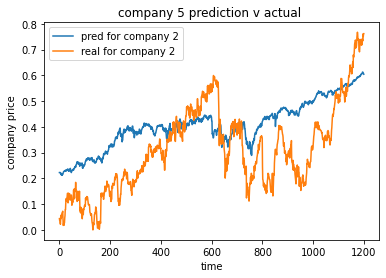

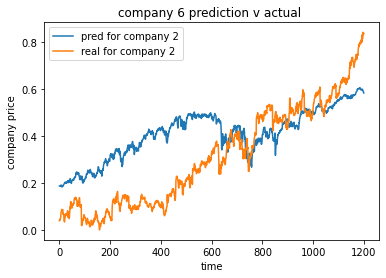

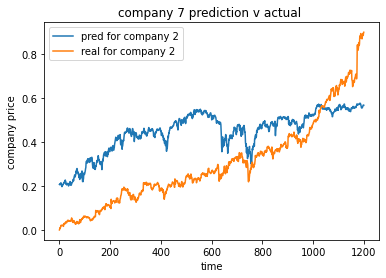

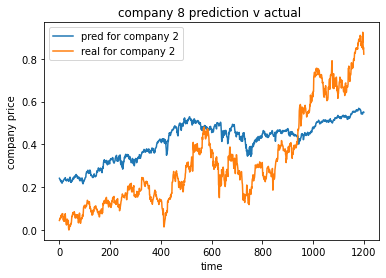

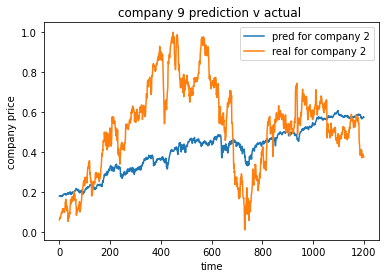

In [305]:

print(np.array(c2c_all_label_window_10).shape)
predictions_individual_window10 = predictCompany(10, i, 1200, model_window_10, c2c_all_data_window_10, c2c_all_label_window_10, 1248, 10)

1259


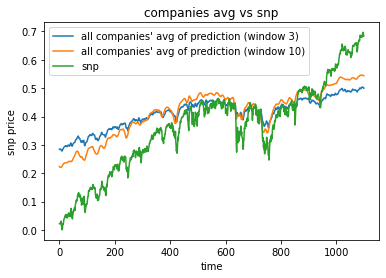

In [292]:
days_to_pred = 1100
plt.plot(np.array(comp_sum_points_window_3[:days_to_pred]), label = "all companies' avg of prediction (window 3)")
plt.plot(np.array(comp_sum_points_window_10[:days_to_pred]), label = "all companies' avg of prediction (window 10)")

#snp data
print(len(snp_data))
plt.plot(np.array(snp_data[:days_to_pred]), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("companies avg vs snp")
plt.show()  

# Let's recreate the model with a different window parameter (30)


In [221]:

#company to company  data
c2c_all_data_window_30 = []
c2c_all_label_window_30 = []
c2c_train_data = []
c2c_train_label = []
c2c_test_data = []
c2c_test_label = []

window_data_points = 30 #TODO, can graph how many window datapoints affects the result. Probably more = better memory

#create our windows
for i in range(len(all_data) - window_data_points - 1):
    temp = []
    for j in range (window_data_points):
        temp.append(all_data[i + j])
    c2c_all_data_window_30.append(temp)
    c2c_all_label_window_30.append(all_data[i + window_data_points])
  
#convert to np arrays
c2c_all_data_window_30 = np.array(c2c_all_data_window_30) 
c2c_all_label_window_30 = np.array(c2c_all_label_window_30) 
c2c_train_data = np.array(c2c_train_data) 
c2c_train_label = np.array(c2c_train_label) 

#split our data
c2c_train_data, c2c_test_data, c2c_train_label, c2c_test_label = train_test_split(c2c_all_data_window_30, c2c_all_label_window_30, test_size=0.1, shuffle=False)

# Need to reshape these datasets into a format LSTM understands
# Train data: 1248 windows, 30 days in the window, 470 companies,2 features (closing price, volume)
# Data: (1105, 10, 470, 2) input tensor into (519350, 30, 2)
# Label: (1105, 470, 2) output tensor into (519350, 2)

# Test data: 123 windows, 30 days per window, 470 companies, 2 features
# Data: (123, 10, 470, 2) => (57810, 30, 2)
# Label: (123, 470, 2) => (57810, 2)

print(c2c_train_data.shape)
print(c2c_test_data.shape)

c2c_train_data = c2c_train_data.reshape(519350, 30, 2)
c2c_train_label = c2c_train_label.reshape(519350, 2)
c2c_test_data = c2c_test_data.reshape(57810, 30, 2)
c2c_test_label = c2c_test_label.reshape(57810, 2)

# print out shapes for reference
print("c2c_train_data shape " + str(c2c_train_data.shape))
print("c2c_train_label shape" + str(c2c_train_label.shape))
print("c2c_test_data shape " + str(c2c_test_data.shape))
print("c2c_test_label shape" + str(c2c_test_label.shape))

(1105, 30, 470, 2)
(123, 30, 470, 2)
c2c_train_data shape (519350, 30, 2)
c2c_train_label shape(519350, 2)
c2c_test_data shape (57810, 30, 2)
c2c_test_label shape(57810, 2)


In [222]:
units = 256
output_size = 1

model_window_30 = keras.Sequential()
model_window_30.add(keras.layers.LSTM(units, activation="relu", return_sequences=False, batch_input_shape=(None, 30, 2)))
model_window_30.add(keras.layers.Dropout(0.2))
model_window_30.add(keras.layers.Dense(2, activation="sigmoid"))

model_window_30.summary()

opt = keras.optimizers.SGD(learning_rate=0.1)

model_window_30.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=["mean_squared_error"],
)

batch_size = 1024
epochs = 30

history_window_30 = model_window_30.fit(
    c2c_train_data, c2c_train_label, validation_data=(c2c_test_data, c2c_test_label), batch_size=batch_size, epochs=epochs
)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 256)               265216    
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 514       
Total params: 265,730
Trainable params: 265,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
508/508 [==============================] - 235s 460ms/step - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0603 - val_mean_squared_error: 0.0603
Epoch 2/30
508/508 [==============================] - 233s 459ms/step - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 3/30
508/508 [=========================

30


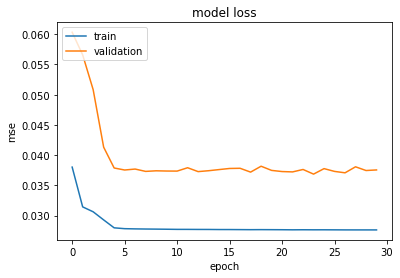

In [223]:
plotModel(history_window_30)

(1228, 30, 470, 2)
(577160, 30, 2)
prediuction shape (1228, 470, 2)
prediuction len 1228
comp_sum_points len1228
1259


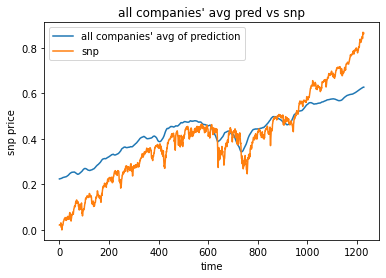

In [302]:
print(c2c_all_data_window_30.shape)
comp_sum_points_window_30 = predict_sum_snp(model_window_30, c2c_all_data_window_30.reshape(577160, 30, 2), 1228) #(1228, 10, 470, 2) becomes (586560, 10, 2)

(1228, 30, 470, 2)
(1228, 470, 2)


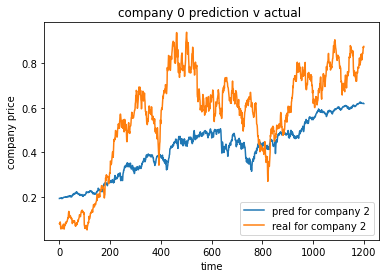

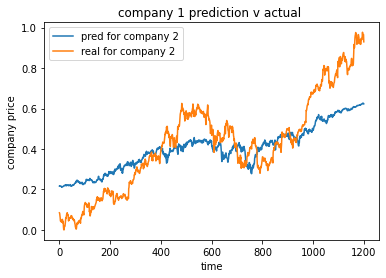

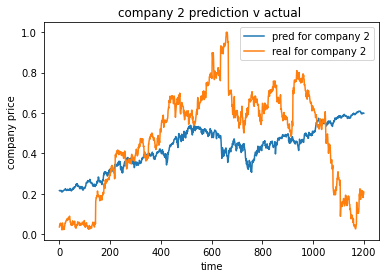

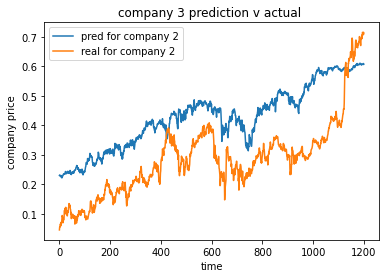

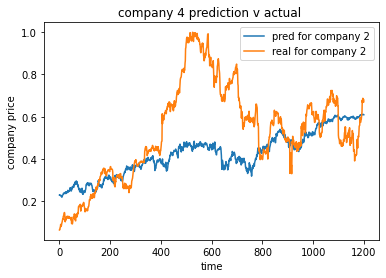

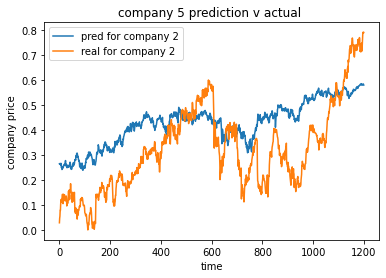

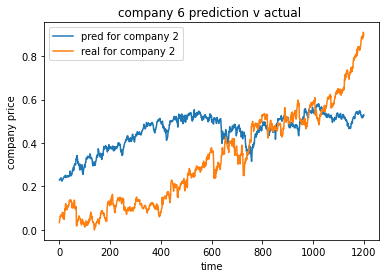

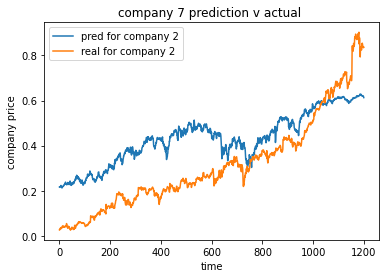

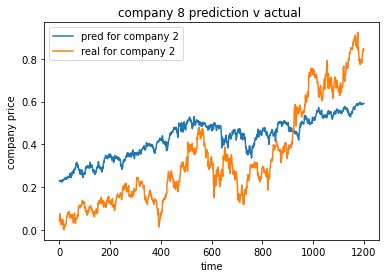

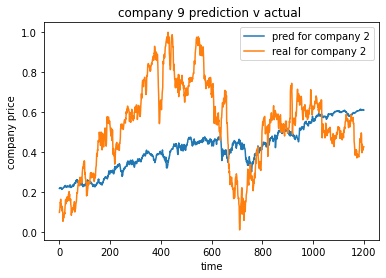

In [306]:
print(np.array(c2c_all_data_window_30).shape)
predictions_individual_window30 = predictCompany(10, i, 1200, model_window_30, c2c_all_data_window_30, c2c_all_label_window_30, 1228, 30)

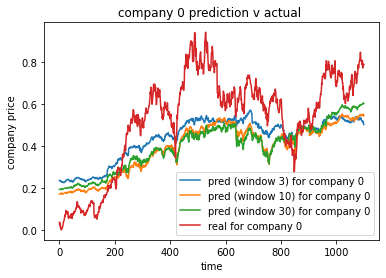

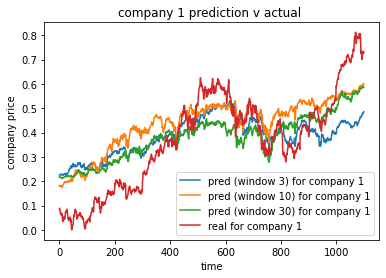

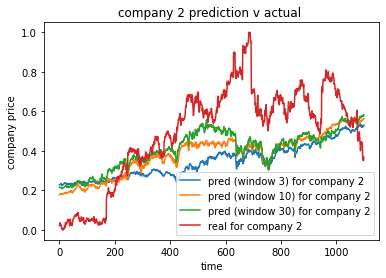

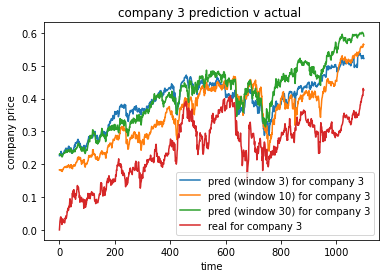

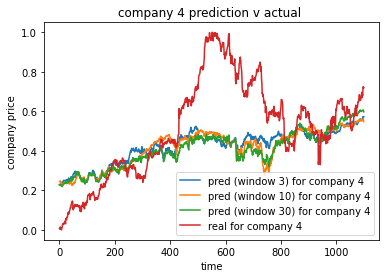

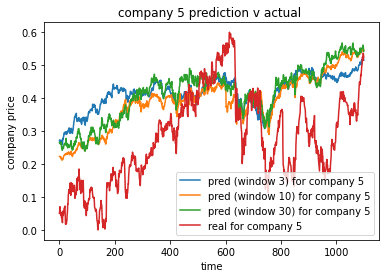

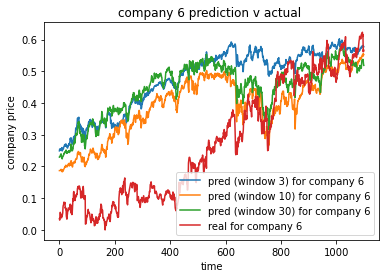

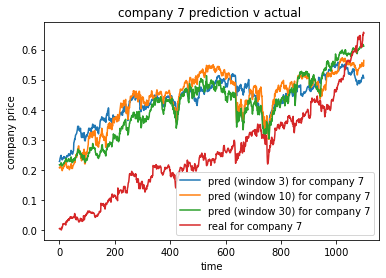

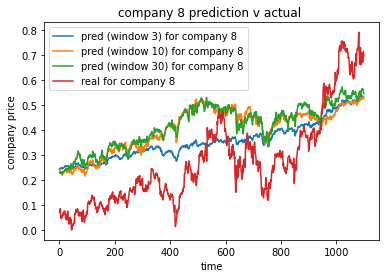

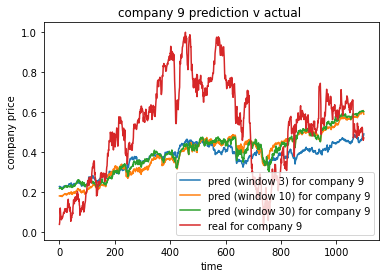

In [311]:

for c in range (10):
        companyPoints = []
        for i in range(days_to_pred):
            companyPoints.append(predictions_individual_window3[i][c][0])
        plt.plot(np.array(companyPoints), label = "pred (window 3) for company " + str(c))

        companyPoints = []
        for i in range(days_to_pred):
            companyPoints.append(predictions_individual_window10[i][c][0])
        plt.plot(np.array(companyPoints), label = "pred (window 10) for company " + str(c))
        
        companyPoints = []
        for i in range(days_to_pred):
            companyPoints.append(predictions_individual_window30[i][c][0])
        plt.plot(np.array(companyPoints), label = "pred (window 30) for company " + str(c))
        
        companyPoints = []
        actual_data = c2c_all_label_window_3.reshape(1255, 470, 2)
        for i in range(days_to_pred):
            companyPoints.append(actual_data[i][c][0])
        plt.plot(np.array(companyPoints), label = "real for company " + str(c))

        plt.xlabel('time')
        plt.ylabel('company price')
        plt.legend()
        plt.title("company " + str(c) + " prediction v actual ")
        plt.show() 

1259


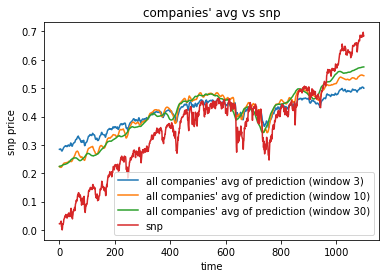

In [312]:
days_to_pred = 1100
plt.plot(np.array(comp_sum_points_window_3[:days_to_pred]), label = "all companies' avg of prediction (window 3)")
plt.plot(np.array(comp_sum_points_window_10[:days_to_pred]), label = "all companies' avg of prediction (window 10)")
plt.plot(np.array(comp_sum_points_window_30[:days_to_pred]), label = "all companies' avg of prediction (window 30)")

#snp data
print(len(snp_data))
plt.plot(np.array(snp_data[:days_to_pred]), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("companies' avg vs snp")
plt.show()  

# lets attempt to see the return if we follow our predictions


1259


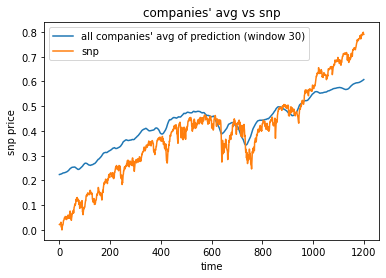

In [382]:
#plot our data for reference
days_to_pred = 1200
plt.plot(np.array(comp_sum_points_window_30[:days_to_pred]), label = "all companies' avg of prediction (window 30)")

#snp data
print(len(snp_data))
plt.plot(np.array(snp_data[:days_to_pred]), label = "snp")
plt.xlabel('time')
plt.ylabel('snp price')
plt.legend()
plt.title("companies' avg vs snp")
plt.show()  

In [418]:
debug_sim = False
allow_shorting = False

def de_normalize(value):
    return (value * (snp_close_max - snp_close_min)) + snp_close_min

class Person():
    def __init__(self, starting_cash):
        self.starting_cash = round(starting_cash,2)
        self.cash = starting_cash
        self.snp_stock_amt = 0
        self.snp_short_amt = 0
        self.trades = 0
        self.state = "sell"
        self.shortPrice = 0
        self.buyPrice = 0
        self.shortProfit = 0
        self.holdProfit = 0
        self.shorts = 0 
        
    def updatePosition(self, snp_price, snp_prediciton):
        if (snp_price < snp_prediciton):
            self.buy(snp_price)
        else:
            if(allow_shorting):
                self.short(snp_price)
            else:
                self.sell(snp_price)  
                
    def buy(self, snp_price): 
        # if we have cash at the beginning
        if (self.state == "sell"):
            self.snp_stock_amt += (self.cash/snp_price)
            self.cash = 0
            self.trades += 1
            self.buyPrice = snp_price
            self.state = "buy"
        elif(self.state == "short"): #if we're reverting a short position
            shortProfit = (self.shortPrice - snp_price) * self.snp_short_amt
            if(debug_sim):
                print("Reverting a short position========")
                print("short profit = (" + str(self.shortPrice) + " - "+ str(snp_price) + ") * " + str(self.snp_short_amt) + " = " + str(shortProfit) )
            self.shortProfit += shortProfit
            self.snp_stock_amt = ((self.shortPrice * self.snp_short_amt) + shortProfit)/snp_price
            self.snp_short_amt = 0
            self.buyPrice = snp_price
            self.trades += 1
            self.shortPrice = 0
            self.cash = 0
            if(debug_sim):
                print("net_value = " + str(self.get_net_value(snp_price)) )
            self.state = "buy"

    def sell(self, snp_price):
        if (self.state == "buy"):
            self.holdProfit += (snp_price - self.buyPrice) * self.snp_stock_amt
            self.cash += snp_price * self.snp_stock_amt
            self.snp_stock_amt = 0
            self.snp_short_amt = 0
            self.trades += 1 
            self.state = "sell"
            
        if(self.state == "short"):
            self.buy(snp_price)
            self.sell(snp_price)
            self.state = "sell"
            self.cash = 0
            
    def short(self, snp_price):
        if(self.state == "buy" ):
            holdProfit = (snp_price - self.buyPrice) * self.snp_stock_amt
            self.holdProfit += holdProfit
            if(debug_sim):
                print("Creating a short position========")
                print("holdProfit = (" + str(snp_price) + " - "+ str(self.buyPrice) + ") * " + str(self.snp_stock_amt) + " = " + str(holdProfit) )
            self.snp_short_amt = self.snp_stock_amt
            self.snp_stock_amt = 0
            self.shortPrice = snp_price
            self.buyPrice = 0
            self.cash = 0
            self.snp = 0
            self.shorts += 1
            self.state = "short"
            if(debug_sim):
                print("net_value = " + str(self.get_net_value(snp_price)) )
        
    def get_net_value(self, snp_price):
        if(debug_sim):
            print("snp_price " + str(snp_price) )
            print("self.cash " + str(self.cash) )
            print("self.snp_stock_amt * snp_price " + str(self.snp_stock_amt * snp_price) )
            print("self.snp_short_amt * snp_price " + str(self.snp_short_amt * snp_price) )
        return round(self.cash + self.snp_stock_amt * snp_price + (self.snp_short_amt * self.shortPrice - self.snp_short_amt * snp_price), 2)
    
    def getHoldProfit(self):
        return round(self.holdProfit, 2)
    
    def getShortProfit(self):
        return round(self.shortProfit, 2)
    
#create a person for each strategy
days_to_predict = 1220
starting_snp_price = de_normalize(snp_data[0])

paper_hands = Person(starting_snp_price) #Will follow our algorithim, will buy when undervalued (we predict it will be higher), and sell when undervalued
diamond_hands = Person(starting_snp_price) #will buy from the beginning and hold till the end

print("Starting SNP price " + str(round(starting_snp_price, 2)))
paper_hands.buy(starting_snp_price)
diamond_hands.buy(starting_snp_price)

print("paper_hands starting value " + str(paper_hands.get_net_value(starting_snp_price) ))
print("diamond_hands starting value " + str(diamond_hands.get_net_value(starting_snp_price) ))

#update position based on values
for d in range (days_to_predict):
    paper_hands.updatePosition(de_normalize(snp_data[d]), de_normalize(comp_sum_points_window_30[d+1]))

#sell at the end to get the final value
final_snp_price = round (de_normalize(snp_data[days_to_predict]), 2)
paper_hands.sell(final_snp_price)
diamond_hands.sell(final_snp_price)

print("Final SNP Price " + str(final_snp_price))
print("\nOverall positions paper_hands (buy based on algo) =============")
print("paper_hands starting value: " + str(paper_hands.starting_cash))
print("paper_hands net value: " + str(paper_hands.get_net_value(final_snp_price)))

if(allow_shorting):
    print("paper_hands hold profit: " + str(paper_hands.getHoldProfit()))
    print("paper_hands short profit: " + str(paper_hands.getShortProfit()))
print("paper_hands trades: " + str(paper_hands.trades))
print("paper_hands shorts: " + str(paper_hands.shorts))

paper_hands_per_return = round(paper_hands.get_net_value(final_snp_price)/paper_hands.starting_cash * 100, 2)
print("paper_hands return: " + str(paper_hands_per_return) + "%")

print("\nOverall positions diamond_hands (buy and hold) =============")
print("diamond_hands starting value: " + str(diamond_hands.starting_cash))
print("diamond_hands net value: " + str(diamond_hands.get_net_value(final_snp_price)))
if(debug_sim):
    print("diamond_hands hold profit: " + str(diamond_hands.getHoldProfit()))
print("diamond_hands trades: " + str(diamond_hands.trades))
print("diamond_hands shorts: " + str(diamond_hands.shorts))
print("diamond_hands return: " + str( round((diamond_hands.get_net_value(final_snp_price)/diamond_hands.starting_cash * 100), 2)) + "%")

Starting SNP price 1517.93
paper_hands starting value 1517.93
diamond_hands starting value 1517.93
Final SNP Price 2664.11

Overall positions paper_hands (buy based on algo) =============
paper_hands starting value: 1517.93
paper_hands net value: 2826.45
paper_hands trades: 26
paper_hands shorts: 0
paper_hands return: 186.2%

Overall positions diamond_hands (buy and hold) =============
diamond_hands starting value: 1517.93
diamond_hands net value: 2664.11
diamond_hands trades: 2
diamond_hands shorts: 0
diamond_hands return: 175.51%
